## Heart dataset

In [161]:
import pandas as pd
from Helpers import helpers
import seaborn as sns
import matplotlib.pyplot as plt
heart_df = helpers.load_dataset('../data/heart-dataset/heart_numerical.csv')
heart_df_with_class = heart_df.copy()

In [162]:
heart_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,class
0,120.0,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,1.0
1,132.0,4.0,0.0,4.0,2.0,130.0,68.0,198.0,6.0,0.0
2,133.0,2.0,0.0,5.0,2.0,130.0,68.0,198.0,5.0,0.0
3,134.0,2.0,0.0,6.0,2.0,117.0,53.0,170.0,11.0,0.0
4,132.0,4.0,0.0,5.0,0.0,117.0,53.0,170.0,9.0,0.0


In [163]:
heart_dataset_columns = ['baseline value', 'histogram_min']
heart_df_2d = heart_df[heart_dataset_columns]
heart_df_2d.describe()

,baseline value,histogram_min
count,2126.000000,2126.000000
mean,133.303857,93.579492
std,9.840844,29.560212
min,106.000000,50.000000
25%,126.000000,67.000000
50%,133.000000,93.000000
75%,140.000000,120.000000
max,160.000000,159.000000


<Axes: xlabel='histogram_min', ylabel='Count'>

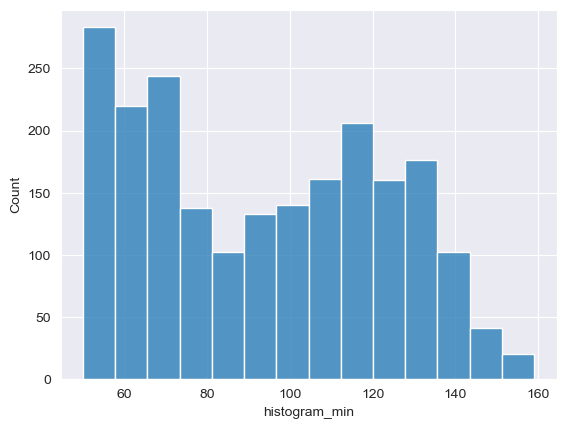

In [164]:
sns.histplot(data=heart_df_2d, x='histogram_min')


<Axes: xlabel='baseline value', ylabel='Count'>

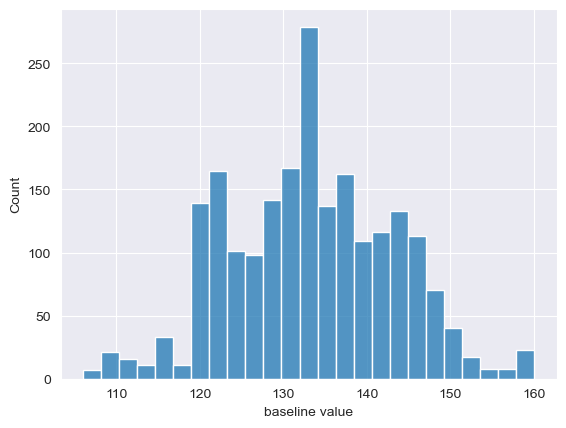

In [165]:
sns.histplot(data=heart_df_2d, x='baseline value')

In [166]:
def compare_perturbed_and_original(plain_df: pd.DataFrame, dataset_name: str, column_name, column_name2):
    heart_df_2d_kd_laplace = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/'+dataset_name+'/perturbed_0.5.csv')

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=plain_df, x=column_name, y=column_name2, ax=axs[0], alpha=0.5)
    sns.scatterplot(data=heart_df_2d_kd_laplace, x=column_name, y=column_name2, ax=axs[1], alpha=0.5)
    axs[0].set_title('kd-Laplace/grid/optimal')
    axs[1].set_title('Original')
    plt.show()

In [167]:
heart_df_2d_kd_laplace = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/heart-dataset/perturbed_0.5.csv')
heart_df_2d_kd_laplace.head()

,baseline value,histogram_min
0,120.779315,59.009136
1,129.677698,67.079546
2,135.753245,69.023752
3,132.867542,55.066215
4,132.690554,53.469255


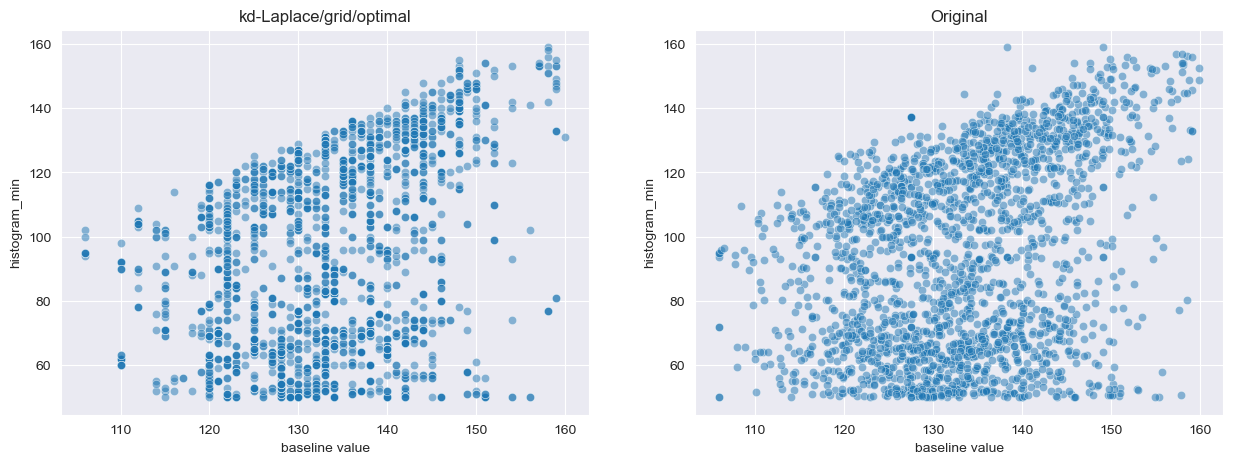

In [168]:
compare_perturbed_and_original(heart_df_2d, 'heart-dataset', 'baseline value', 'histogram_min')

In [169]:
seeds_df = helpers.load_dataset('../data/seeds-dataset/rq1.csv')
seeds_df_2_columns = ['area', 'perimeter']
seeds_df_2 = seeds_df[seeds_df_2_columns]
seeds_df_2.describe()

,area,perimeter
count,210.000000,210.000000
mean,14.847524,14.559286
std,2.909699,1.305959
min,10.590000,12.410000
25%,12.270000,13.450000
50%,14.355000,14.320000
75%,17.305000,15.715000
max,21.180000,17.250000


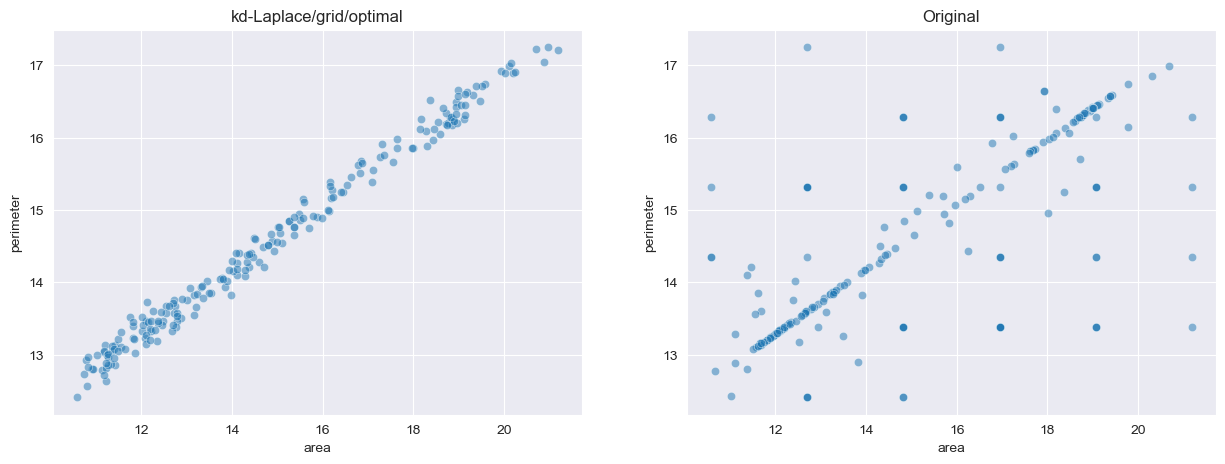

In [170]:
compare_perturbed_and_original(seeds_df_2, 'seeds-dataset', 'area', 'perimeter')


Because the perturbation spreads out the data evenly, it messes up the shape of the data.
If the original datashape is already spread out, the perturbation does not change the shape of the data.
The seeds-dataset is a line shape, so we see that the perturbation reshapes the data entirely. It is therefore also expected the utility suffers for this type of data.

We evaluate if the distribution of the data is preserved by looking at the histogram of the data.

<Axes: xlabel='area', ylabel='Count'>

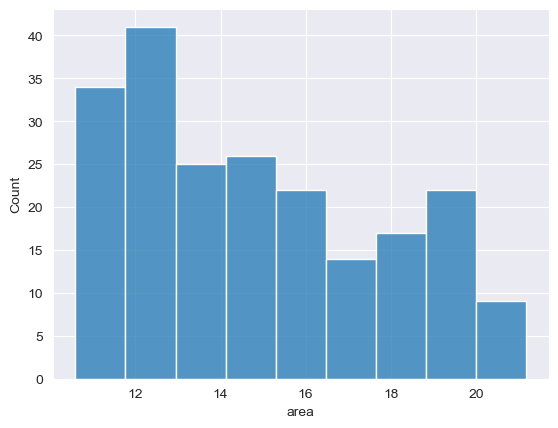

In [171]:
sns.histplot(data=seeds_df_2, x='area')


<Axes: xlabel='perimeter', ylabel='Count'>

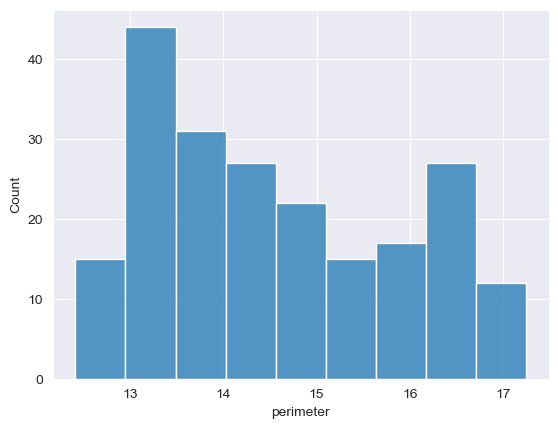

In [172]:
sns.histplot(data=seeds_df_2, x='perimeter')


In [173]:
seeds_df_2_perturbed = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/seeds-dataset/perturbed_0.5.csv')
seeds_df_2_perturbed.head()

,area,perimeter
0,14.826000,15.314000
1,21.180000,13.378000
2,15.836859,14.824400
3,12.195396,13.371492
4,12.107834,13.331975


<Axes: xlabel='perimeter', ylabel='Count'>

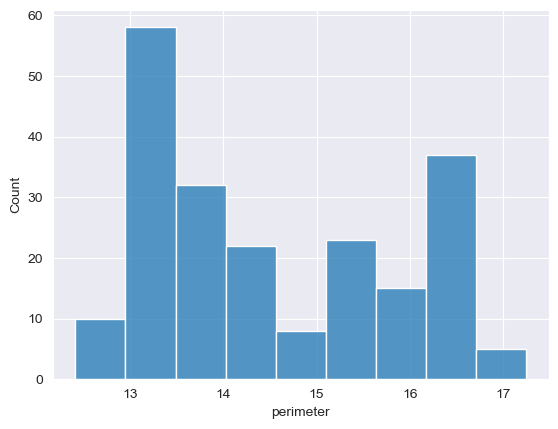

In [174]:
sns.histplot(data=seeds_df_2_perturbed, x='perimeter')


<Axes: xlabel='area', ylabel='Count'>

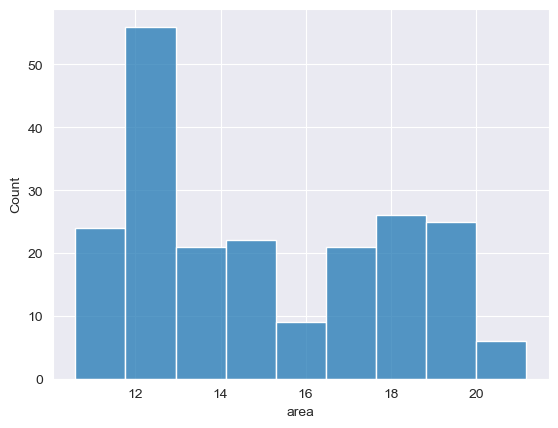

In [175]:
sns.histplot(data=seeds_df_2_perturbed, x='area')


Because both datasets are very different in number of datapoints, we are not b-eable to compare them without ruling out the impact of size.
Therefore, we will select the same amount of data-points from the heart-dataset as the seeds-dataset.
This way we're be-able to show the impact of the perturbation on the shape of the data.


In [176]:
# select 210 datapoints from the heart-dataset
heart_df_2d_sample = heart_df_2d.sample(n=210, random_state=23)
# compare the sample data with the original data by checking the std / mean
print(heart_df_2d_sample.describe())
print(heart_df_2d.describe())

       baseline value  histogram_min
count      210.000000     210.000000
mean       132.347619      95.138095
std          9.513934      29.502331
min        106.000000      50.000000
25%        125.000000      67.000000
50%        132.000000     101.000000
75%        139.750000     120.000000
max        159.000000     149.000000
       baseline value  histogram_min
count     2126.000000    2126.000000
mean       133.303857      93.579492
std          9.840844      29.560212
min        106.000000      50.000000
25%        126.000000      67.000000
50%        133.000000      93.000000
75%        140.000000     120.000000
max        160.000000     159.000000


In [177]:
print(heart_df_2d_sample.shape, seeds_df_2.shape)

(210, 2) (210, 2)


Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
     baseline value  histogram_min  is_remapped
0        120.236851      53.102137        False
1        123.174999     104.559578        False
2        127.137914     103.308393        False
3        134.540367      72.930490        False
4        111.079360      53.358164        False
..              ...            ...          ...
205      121.794837     112.027663        False
206      133.005771     131.903251        False
207      144.986194     129.883708        False
208      134.583414      67.180286        False
209      144.264334     115.231365        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (12, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


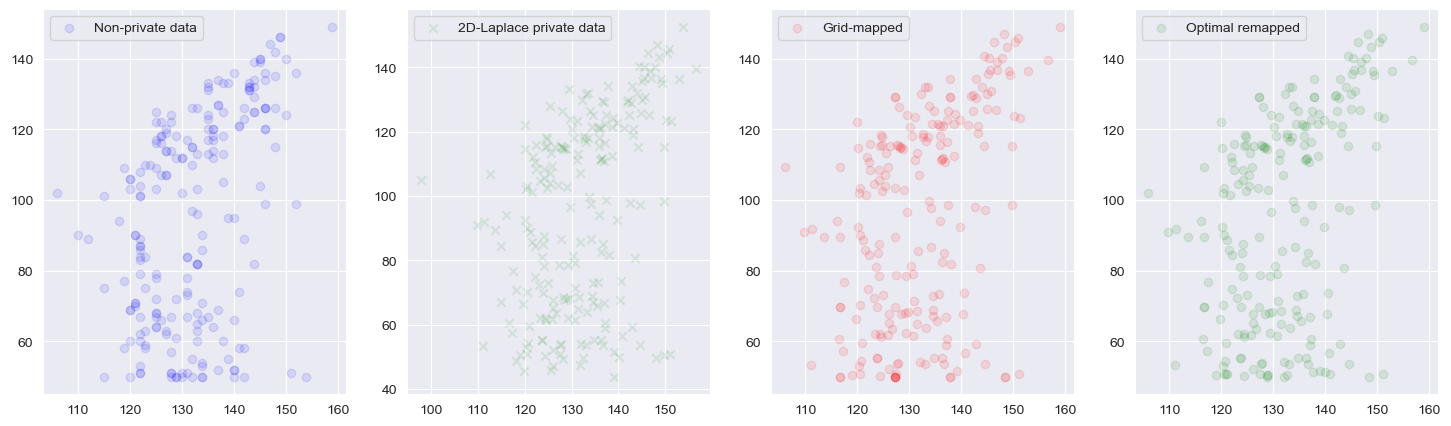

In [178]:
from Helpers import ldp_mechanism
ldp = ldp_mechanism.ldp_mechanism()
heart_df_2d_sample_perturbed = ldp.randomise(heart_df_2d_sample, 0.5, plot_validation=True)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
          area  perimeter  is_remapped
0    16.442427  15.701629        False
1    16.944000  16.282000        False
2    13.798717  14.444901        False
3    21.180000  13.378000         True
4    10.590000  14.346000         True
..         ...        ...          ...
205  10.590000  14.346000         True
206  12.708000  12.410000         True
207  14.826000  12.410000         True
208  12.708000  16.282000        False
209  12.708000  12.410000         True

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (122, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


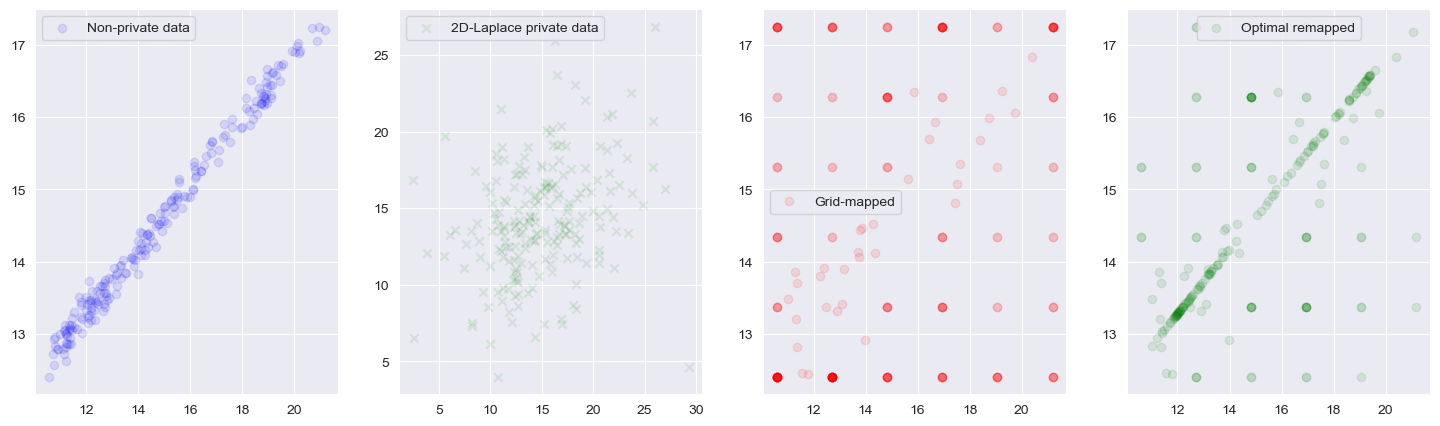

In [179]:
seeds_df_2_perturbed = ldp.randomise(seeds_df_2, 0.5, plot_validation=True)

In [180]:
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, silhouette_score
from sklearn import clone
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from Helpers import helpers
k_means_model = KMeans(n_clusters=4, init='random', n_init='auto')
def measure_external_validity_report(cluster_model, columns, plain_df, perturbed_df):
    plain_df = plain_df[columns]
    perturbed_df = perturbed_df[columns]
    plain_df_scaled = StandardScaler().fit_transform(plain_df)
    perturbed_df_scaled = StandardScaler().fit_transform(perturbed_df)
    plain_fitted_df = cluster_model.fit(plain_df_scaled)
    perturbed_fitted_df = clone(cluster_model).fit(perturbed_df_scaled)
    ami = adjusted_mutual_info_score(plain_fitted_df.labels_, perturbed_fitted_df.labels_)
    ari = adjusted_rand_score(plain_fitted_df.labels_, perturbed_fitted_df.labels_)
    ch = 0.0
    sc = 0
    try:
        ch = calinski_harabasz_score(perturbed_df_scaled, perturbed_fitted_df.labels_)
    except:
        print('Calinski Harabasz score failed, defaulting to 0.0 as score')
    try:
        sc = silhouette_score(perturbed_df_scaled, perturbed_fitted_df.labels_)
    except:
        print('Silhouette score failed, defaulting to 0 as score')
    return ami, ari, ch, sc
def generate_utility_report(epsilon, columns, plain_df):
    dataframe = {'type': [], 'epsilon': [], 'ari': [], 'ami': [], 'ch': [], 'sc': []}
    perturbed_df = ldp.randomise(plain_df, epsilon, plot_validation=True)
    n_times = 10
    algorithmName = helpers.map_models_to_name(k_means_model)
    dataframe['type'].append(algorithmName)
    dataframe['epsilon'].append(epsilon)
    ami_list = []
    ari_list = []
    ch_list = []
    sc_list = []
    for i in range(n_times):
        ami, ari, ch, sc = measure_external_validity_report(k_means_model, columns, plain_df, perturbed_df)
        ami_list.append(ami)
        ari_list.append(ari)
        ch_list.append(ch)
        sc_list.append(sc)
    ami = np.sum(ami_list) / n_times
    ari = np.sum(ari_list) / n_times
    dataframe['ami'].append(ami)
    dataframe['ari'].append(ari)
    dataframe['ch'].append(np.sum(ch_list) / n_times)
    dataframe['sc'].append(np.sum(sc_list) / n_times)
    return pd.DataFrame(dataframe)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
     baseline value  histogram_min  is_remapped
0        127.200000      50.000000         True
1        119.284596     105.589845        False
2        132.505255     102.087643        False
3        136.720726      67.368228        False
4        116.600000      50.000000         True
..              ...            ...          ...
205      120.600990     109.125777        False
206      138.364824     133.418086        False
207      143.276168     132.011785        False
208      135.414643      66.863679        False
209      147.668130     117.661314        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (13, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


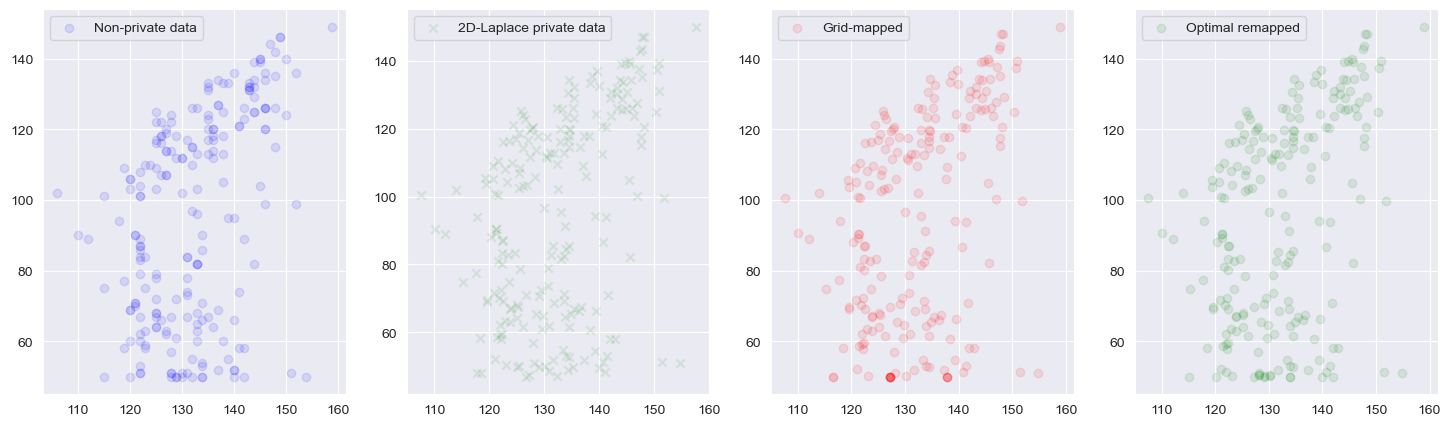

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",1.5,0.888117,0.873626,262.920113,0.450423


In [181]:
utility_heart_sample_2d = generate_utility_report(1.5, heart_dataset_columns, heart_df_2d_sample)
utility_heart_sample_2d

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
          area  perimeter  is_remapped
0    14.061275  14.021309        False
1    14.735508  14.855205        False
2    13.581441  12.915280        False
3    11.200730  13.448007        False
4    14.826000  16.282000        False
..         ...        ...          ...
205  12.708000  14.346000        False
206  11.615209  13.578568        False
207  12.671544  13.163481        False
208  11.280485  13.700341        False
209  11.564431  13.088201        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (52, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


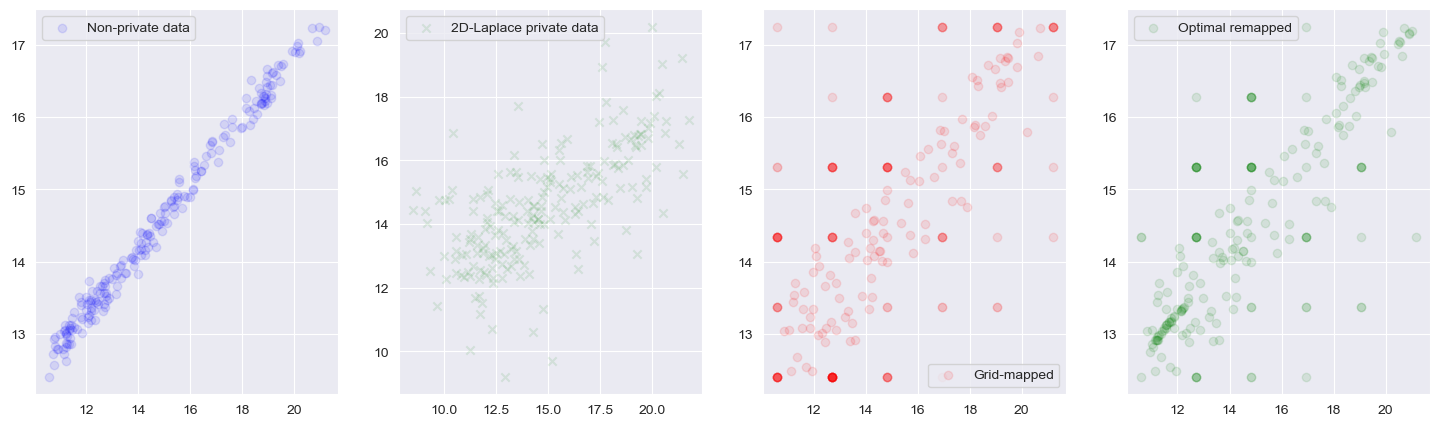

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",1.5,0.441865,0.468869,382.124012,0.473917


In [182]:
utility_seeds_2d = generate_utility_report(1.5, seeds_df_2_columns, seeds_df_2)
utility_seeds_2d

We see a clear difference between the two dataset related to the external validity.
In addition, we now analyze the security implications.
The expectation is that the seeds dataset is more secure than the heart dataset, due to it has more spread and therefore more distance.

In [183]:
heart_df_2d_sample_y = heart_df_with_class.iloc[heart_df_2d_sample.index]
heart_df_2d_sample_y = heart_df_2d_sample_y['class']
heart_df_2d_sample_y

568     0.0
460     0.0
1521    0.0
953     0.0
38      0.0
       ... 
1270    0.0
1964    0.0
1808    0.0
767     2.0
805     0.0
Name: class, Length: 210, dtype: float64

In [184]:
heart_df_2d_sample_y.isnull().values.any()
heart_df_2d_sample.head()

,baseline value,histogram_min
568,128.0,50.0
460,120.0,106.0
1521,133.0,103.0
953,136.0,64.0
38,115.0,50.0


In [185]:
heart_y_count = len(heart_df_2d_sample_y.unique())
print(heart_y_count, heart_df_2d_sample.columns.values,heart_df_2d_sample_y)

3 ['baseline value' 'histogram_min'] 568     0.0
460     0.0
1521    0.0
953     0.0
38      0.0
       ... 
1270    0.0
1964    0.0
1808    0.0
767     2.0
805     0.0
Name: class, Length: 210, dtype: float64


In [186]:
print(heart_df_2d_sample.shape, heart_df_2d_sample_y.shape)

(210, 2) (210,)


In [195]:
security_heart_df = helpers.run_mi_experiments(heart_df_2d_sample.values, heart_df_2d_sample_y, [1.5], algorithm=ldp.randomise, n_times=10, targets=heart_y_count, columns=heart_df_2d_sample.columns.values)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
    baseline value  histogram_min  is_remapped
0       145.831964     140.105904        False
1       137.918658      54.951545        False
2       129.254058      64.286423        False
3       122.241898      64.656261        False
4       122.974642      78.402352        False
5       127.603220     114.831320        False
6       120.294568      89.747812        False
7       131.568711     112.247540        False
8       128.870860      71.803851        False
9       149.000000     146.000000         True
10      131.521475      51.330697        False
11      145.685328     126.843813        False
12      134.446489     132.714447        False
13      133.758687      86.988563        False
14      125.574942     119.002664        False
15      144.378668      82.655114        Fal

In [196]:
security_heart_df.groupby(['epsilon']).mean()

,shokri_mi_adv,attack_adv,tpr,fpr,run
epsilon,,,,,
1.5,0.346154,0.6535,"[0.0, 0.8, 1.0]","[0.0, 0.45384615384615373, 1.0]",4.5


In [200]:
seeds_df_2d_sample_y = seeds_df.iloc[seeds_df.index]
seeds_df_2d_sample_y = seeds_df_2d_sample_y['class']
seeds_df_2d_sample_y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: class, Length: 210, dtype: int64

In [201]:
seeds_y_count = len(seeds_df_2d_sample_y.unique())
seeds_y_count

3

In [202]:
security_seeds_df = helpers.run_mi_experiments(seeds_df_2.values, seeds_df_2d_sample_y, [1.5], algorithm=ldp.randomise, n_times=10, targets=seeds_y_count, columns=seeds_df_2.columns.values)


Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
         area  perimeter  is_remapped
0   13.842000  16.340000         True
1   11.850103  13.161486        False
2   15.448710  14.619492        False
3   13.842000  12.410000         True
4   12.216000  13.982000        False
5   11.137336  13.099194        False
6   15.726469  15.089764        False
7   10.590000  12.410000         True
8   18.720000  16.340000         True
9   18.720000  14.768000        False
10  10.752224  12.899561        False
11  12.216000  12.410000        False
12  17.094000  14.768000        False
13  17.094000  15.554000        False
14  10.590000  12.410000         True
15  13.842000  15.554000        False
16  10.590000  12.410000         True
17  12.870376  13.020489        False
18  14.512019  14.169132        False
19  10.636775  12.890902        Fals

In [203]:
security_seeds_df.groupby(['epsilon']).mean()

,shokri_mi_adv,attack_adv,tpr,fpr,run
epsilon,,,,,
1.5,0.165385,0.576686,"[0.0, 0.6653846153846155, 1.0]","[0.0, 0.5, 1.0]",4.5


Also security-wise there is a big difference. The seeds dataset is more secure than the heart dataset. This is due to the fact that the seeds dataset has more spread and therefore more distance between the datapoints. It was expected, as the AMI / ARI also was not really good for the seeds-dataset.

## Setup research
We generate different equal sized datasets with different shapes and use this to prove our point.
- 1000 datapoints with 2 dimensions with a line shape data.
- 1000 datasets with 2 dimensions with a circle shape data.
- 1000 datasets with 2 dimensions with a data skewed to the left.

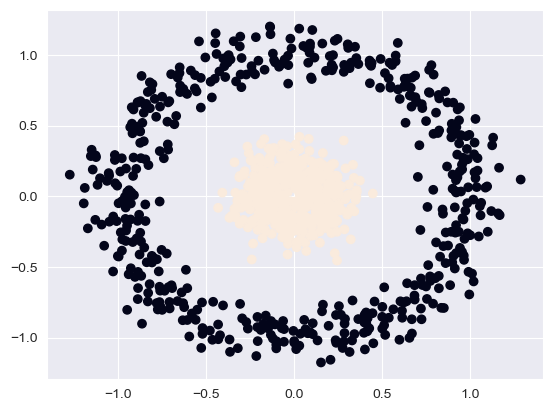

In [204]:
from sklearn.datasets import make_classification, make_circles

circle_X, circle_y = make_circles(n_samples=(1000), random_state=3, noise=0.1, factor=0.2)
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y)


In [229]:
from sklearn.datasets import make_regression

line_X, line_y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[1.0],
    random_state=42
)

df = pd.concat([pd.DataFrame(line_X), pd.Series(line_y)], axis=1)
df.columns = ['x1', 'x2', 'y']
# 5 random rows
df.sample(5)

,x1,x2,y
379,2.415945,-0.400142,0
980,1.430200,-0.690589,1
713,1.121314,-0.921351,0
682,1.077060,-0.880251,0
650,0.740435,-0.739635,0


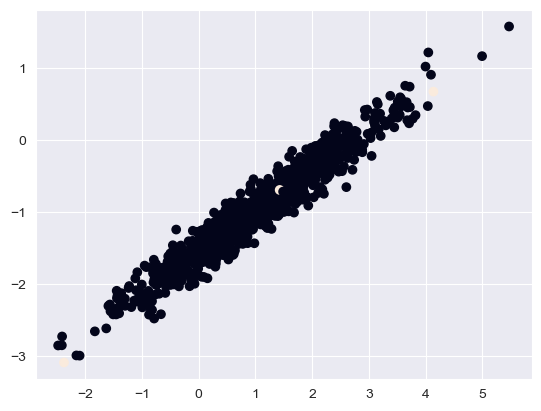

In [230]:
plt.scatter(line_X[:, 0], line_X[:, 1], c=line_y)

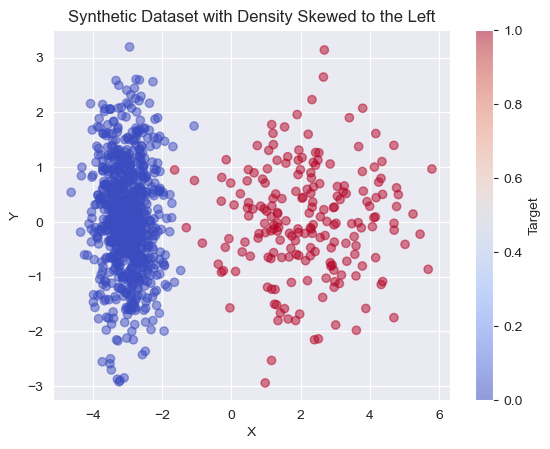

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate the synthetic dataset
num_samples = 1000

# Generate X values with a higher density on the left side
x_left = np.random.normal(loc=-3, scale=0.5, size=int(num_samples * 0.8))
x_right = np.random.normal(loc=2, scale=1.5, size=int(num_samples * 0.2))
x = np.concatenate((x_left, x_right))

# Generate Y values with a normal distribution
y = np.random.normal(loc=0, scale=1, size=num_samples)

# Assign target variable based on X values
targets = np.where(np.isin(x, x_left), 0, 1)

# Combine X, Y, and targets into a DataFrame
data = pd.DataFrame({'X': x, 'Y': y, 'Target': targets})

# Plot the scatter plot
plt.scatter(data['X'], data['Y'], c=data['Target'], cmap='coolwarm', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Dataset with Density Skewed to the Left')
plt.colorbar(label='Target')
plt.show()


In [247]:
def generate_left_skewed_dataset(datapoints = 1000):
    # Generate X values with a higher density on the left side
    x_left = np.random.normal(loc=-3, scale=0.5, size=int(datapoints * 0.8))
    x_right = np.random.normal(loc=2, scale=1.5, size=int(datapoints * 0.2))
    x = np.concatenate((x_left, x_right))

    # Generate Y values with a normal distribution
    y = np.random.normal(loc=0, scale=1, size=datapoints)

    # Assign target variable based on X values
    targets = np.where(np.isin(x, x_left), 0, 1)

    # Combine X, Y, and targets into a DataFrame
    data = pd.DataFrame({'x1': x, 'x2': y, 'y': targets})
    return data

In [254]:
def generate_test_datasets(datapoints = 1000, plot=False):
    circle_X, circle_y = make_circles(n_samples=(datapoints), random_state=3, noise=0.1, factor=0.2)

    df_circle_X = pd.concat([pd.DataFrame(circle_X), pd.Series(circle_y)], axis=1)
    df_circle_X.columns = ['x1', 'x2', 'y']
    line_X, line_y = make_classification(
        n_samples=datapoints,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[1.0],
        random_state=42
    )
    df_line_X = pd.concat([pd.DataFrame(line_X), pd.Series(line_y)], axis=1)
    df_line_X.columns = ['x1', 'x2', 'y']

    df_skewed_X = generate_left_skewed_dataset(datapoints)

    if plot:
        fig, ax = plt.subplots(1, 3, figsize=(18, 5))
        ax[0].scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y)
        ax[1].scatter(line_X[:, 0], line_X[:, 1], c=line_y)
        ax[2].scatter(df_skewed_X['x1'], df_skewed_X['x2'], c=df_skewed_X['y'])
        plt.show()
    return df_circle_X, df_line_X, df_skewed_X

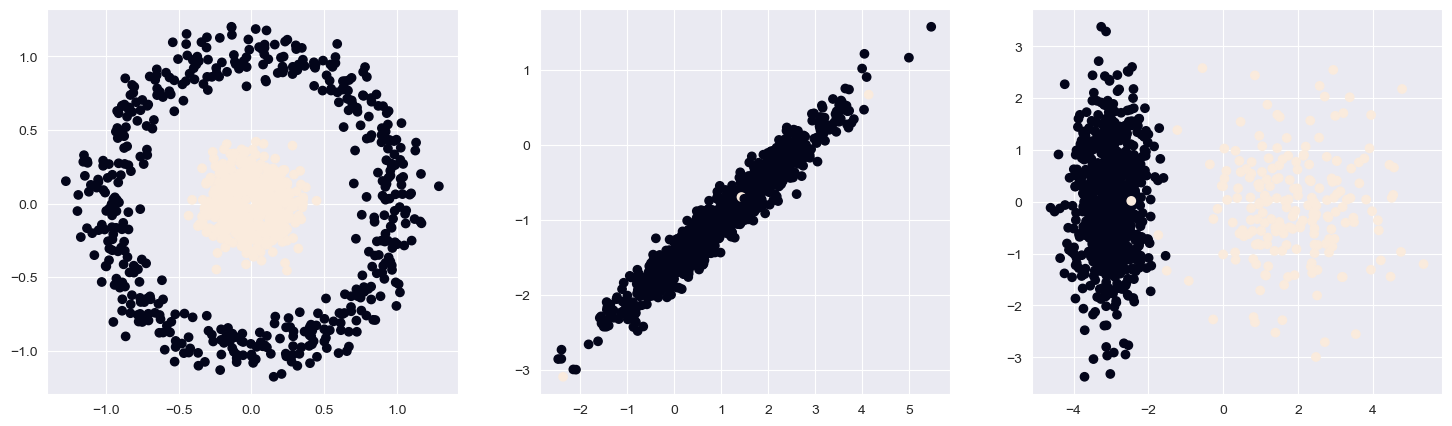

In [255]:
df_circle_X, df_line_X, df_skewed_X = generate_test_datasets(1000, True)